<h2 style="text-align:center; color:#1f77b4;">
IMPORTING LIBRARIES
</h2>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

<h2 style="text-align:center; color:#1f77b4;">
BASIC INSPECTION OF THE DATASET
</h2>

In [4]:
df = pd.read_csv("uber_bookings_clean.csv")
df.head()

,ride_date,ride_time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,incomplete_reason,booking_value,ride_distance,driver_rating,customer_rating,payment_method,ride_type,ride_hour,ride_weekday,ride_month
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,EBike,Palam Vihar,Jhilmil,\N,\N,...,\N,\N,\N,\N,\N,\N,No Driver Found,12,5,3
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.90,14.00,...,Vehicle Breakdown,237.00,5.73,\N,\N,UPI,Incomplete,18,4,11
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.40,25.80,...,\N,627.00,13.58,4.90,4.90,Debit Card,Completed,8,4,8
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.10,28.50,...,\N,416.00,34.02,4.60,5.00,UPI,Completed,17,0,10
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.30,19.60,...,\N,737.00,48.21,4.10,4.30,UPI,Completed,22,0,9


In [5]:
df.shape

(150000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ride_date              150000 non-null  object
 1   ride_time              150000 non-null  object
 2   booking_id             150000 non-null  object
 3   booking_status         150000 non-null  object
 4   customer_id            150000 non-null  object
 5   vehicle_type           150000 non-null  object
 6   pickup_location        150000 non-null  object
 7   drop_location          150000 non-null  object
 8   avg_vtat               150000 non-null  object
 9   avg_ctat               150000 non-null  object
 10  cancelled_by_customer  150000 non-null  object
 11  cust_cancel_reason     150000 non-null  object
 12  cancelled_by_driver    150000 non-null  object
 13  driver_cancel_reason   150000 non-null  object
 14  incomplete_rides       150000 non-null  object
 15  

In [7]:
df.describe()

,ride_hour,ride_weekday,ride_month
count,150000.000000,150000.000000,150000.000000
mean,14.034113,2.996987,6.490940
std,5.416906,2.003202,3.444028
min,0.000000,0.000000,1.000000
25%,10.000000,1.000000,3.000000
50%,15.000000,3.000000,7.000000
75%,18.000000,5.000000,9.000000
max,23.000000,6.000000,12.000000


In [8]:
df = df.replace("\\N", np.nan)

In [9]:
df.head()

,ride_date,ride_time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,incomplete_reason,booking_value,ride_distance,driver_rating,customer_rating,payment_method,ride_type,ride_hour,ride_weekday,ride_month
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,EBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No Driver Found,12,5,3
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.90,14.00,...,Vehicle Breakdown,237.00,5.73,NaN,NaN,UPI,Incomplete,18,4,11
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.40,25.80,...,NaN,627.00,13.58,4.90,4.90,Debit Card,Completed,8,4,8
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.10,28.50,...,NaN,416.00,34.02,4.60,5.00,UPI,Completed,17,0,10
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.30,19.60,...,NaN,737.00,48.21,4.10,4.30,UPI,Completed,22,0,9


<h2 style="text-align:center; color:#1f77b4;">
MODIFYING THE DATASET
</h2>

In [10]:
numeric_cols = [
    'avg_vtat', 'avg_ctat', 'cancelled_by_customer', 'cancelled_by_driver',
    'incomplete_rides', 'booking_value', 'ride_distance',
    'driver_rating', 'customer_rating'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
df['ride_date'] = pd.to_datetime(df['ride_date'], errors='coerce')
df['ride_time'] = pd.to_datetime(df['ride_time'], errors='coerce').dt.time

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\1045900722.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ride_time'] = pd.to_datetime(df['ride_time'], errors='coerce').dt.time


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ride_date              150000 non-null  datetime64[ns]
 1   ride_time              150000 non-null  object        
 2   booking_id             150000 non-null  object        
 3   booking_status         150000 non-null  object        
 4   customer_id            150000 non-null  object        
 5   vehicle_type           150000 non-null  object        
 6   pickup_location        150000 non-null  object        
 7   drop_location          150000 non-null  object        
 8   avg_vtat               139500 non-null  float64       
 9   avg_ctat               102000 non-null  float64       
 10  cancelled_by_customer  10500 non-null   float64       
 11  cust_cancel_reason     10500 non-null   object        
 12  cancelled_by_driver    27000 non-null   floa

<h2 style="text-align:center; color:#1f77b4;">
CHECKING NULLS AND DUPLICATES</h2>

In [13]:
df.isnull().sum()

ride_date                     0
ride_time                     0
booking_id                    0
booking_status                0
customer_id                   0
vehicle_type                  0
pickup_location               0
drop_location                 0
avg_vtat                  10500
avg_ctat                  48000
cancelled_by_customer    139500
cust_cancel_reason       139500
cancelled_by_driver      123000
driver_cancel_reason     123000
incomplete_rides         141000
incomplete_reason        141000
booking_value             48000
ride_distance             48000
driver_rating             57000
customer_rating           57000
payment_method            48000
ride_type                     0
ride_hour                     0
ride_weekday                  0
ride_month                    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

<h2 style="text-align:center; color:#1f77b4;">
DATA VALIDATION</h2>

In [15]:
df.describe(include = 'all')

,ride_date,ride_time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,incomplete_reason,booking_value,ride_distance,driver_rating,customer_rating,payment_method,ride_type,ride_hour,ride_weekday,ride_month
count,150000,150000,150000,150000,150000,150000,150000,150000,139500.000000,102000.000000,...,9000,102000.000000,102000.000000,93000.000000,93000.000000,102000,150000,150000.000000,150000.000000,150000.000000
unique,NaN,62910,148767,5,148788,7,176,176,NaN,NaN,...,3,NaN,NaN,NaN,NaN,5,5,NaN,NaN,NaN
top,NaN,17:44:57,CNR3648267,Completed,CID6715450,Auto,Khandsa,Ashram,NaN,NaN,...,Customer Demand,NaN,NaN,NaN,NaN,UPI,Completed,NaN,NaN,NaN
freq,NaN,16,3,93000,3,37419,949,936,NaN,NaN,...,3040,NaN,NaN,NaN,NaN,45909,93000,NaN,NaN,NaN
mean,2024-06-30 16:42:40.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.456352,29.149636,...,NaN,508.295912,24.637012,4.230992,4.404584,NaN,NaN,14.034113,2.996987,6.490940
min,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,10.000000,...,NaN,50.000000,1.000000,3.000000,3.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,2024-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,21.600000,...,NaN,234.000000,12.460000,4.100000,4.200000,NaN,NaN,10.000000,1.000000,3.000000
50%,2024-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,28.800000,...,NaN,414.000000,23.720000,4.300000,4.500000,NaN,NaN,15.000000,3.000000,7.000000
75%,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.300000,36.800000,...,NaN,689.000000,36.820000,4.600000,4.800000,NaN,NaN,18.000000,5.000000,9.000000
max,2024-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,45.000000,...,NaN,4277.000000,50.000000,5.000000,5.000000,NaN,NaN,23.000000,6.000000,12.000000


<h2 style="text-align:center; color:#1f77b4;">
UNIVARIATE ANALYSIS</h2>

<h3 style="text-align:left; color:#1f77b4;">
1. RIDE TYPE</h3>

In [16]:
df['ride_type'].value_counts()

ride_type
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\2142928703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


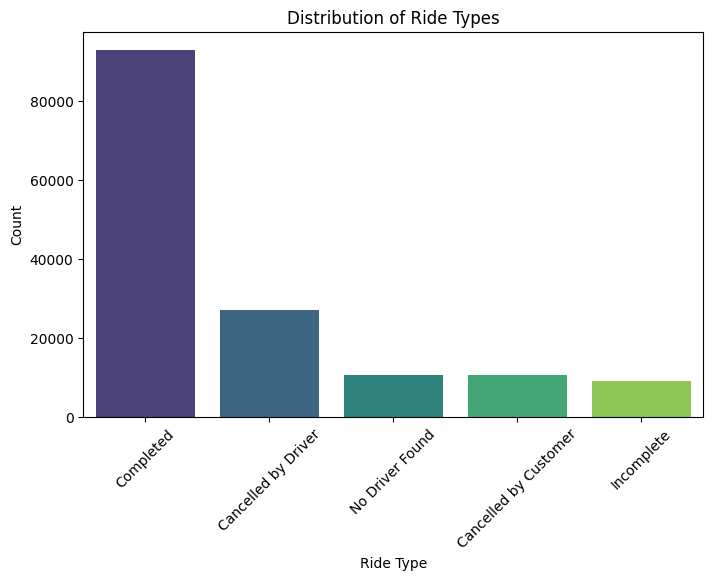

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(
    data = df,
    x = 'ride_type',
    order = df['ride_type'].value_counts().index,
    palette = 'viridis'
)
plt.title("Distribution of Ride Types")
plt.xlabel("Ride Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
2. VEHICLE TYPE</h3>

In [18]:
df['vehicle_type'].value_counts()

vehicle_type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
EBike            10557
Uber XL           4449
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\4151616043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


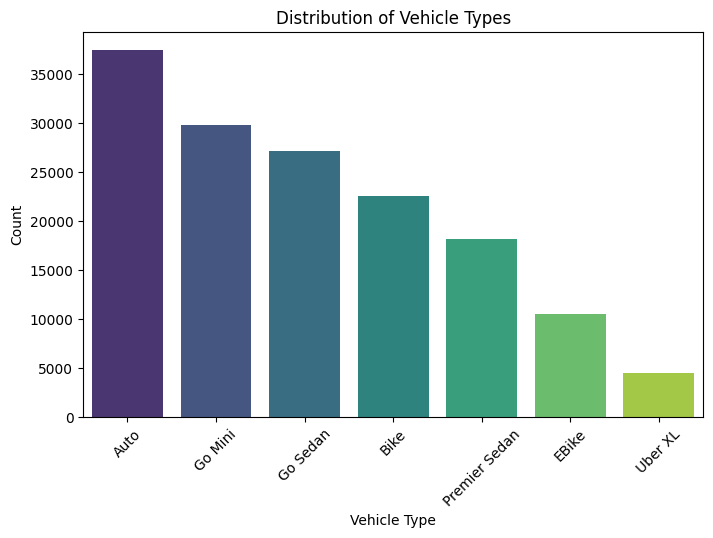

In [20]:
plt.figure(figsize = (8,5))
sns.countplot(
    data = df,
    x = 'vehicle_type',
    order = df['vehicle_type'].value_counts().index,
    palette = 'viridis'
)
plt.title("Distribution of Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
3. PAYMENT METHOD</h3>

In [33]:
df['payment_method'].value_counts()

payment_method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\2142150071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


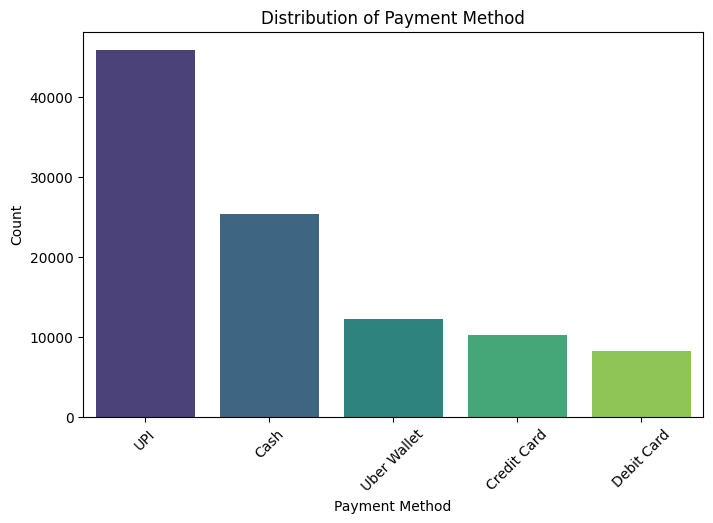

In [36]:
plt.figure(figsize =(8,5))
sns.countplot(
    data = df,
    x = 'payment_method',
    order = df['payment_method'].value_counts().index,
    palette = 'viridis'
)
plt.title("Distribution of Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
4. RIDE HOUR</h3>

In [37]:
df['ride_hour'].value_counts().sort_index()

ride_hour
0      1373
1      1360
2      1339
3      1383
4      1321
5      2786
6      4160
7      5450
8      6861
9      8234
10     9577
11     8390
12     7006
13     5470
14     7031
15     8202
16     9633
17    11044
18    12397
19    11047
20     9630
21     8103
22     5441
23     2762
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\41941711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


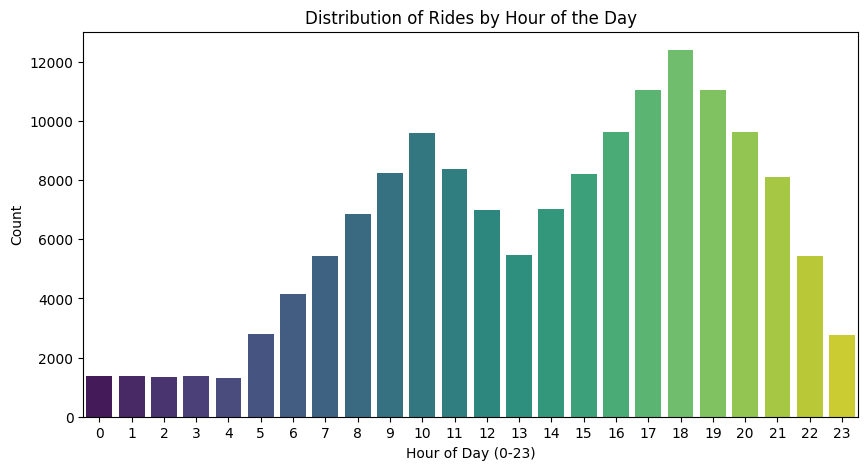

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(
    data = df,
    x = 'ride_hour',
    order = sorted(df['ride_hour'].unique()),
    palette = 'viridis'
)
plt.title("Distribution of Rides by Hour of the Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Count")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
5. RIDE WEEKDAY</h3>

In [39]:
df['ride_weekday'].value_counts().sort_index()

ride_weekday
0    21644
1    21391
2    21413
3    21215
4    21397
5    21542
6    21398
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\2704193811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


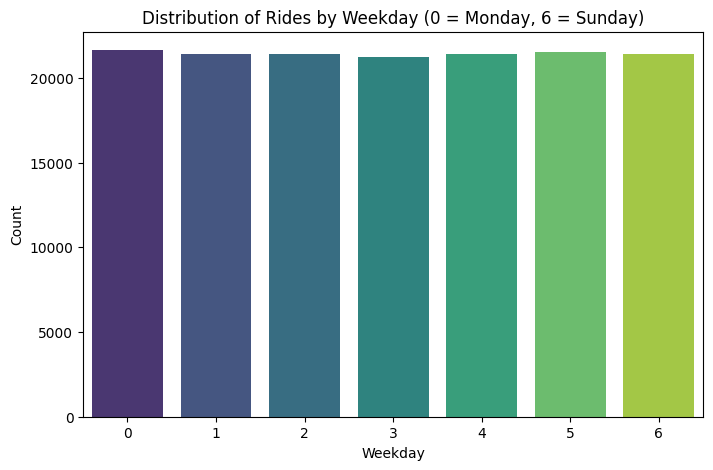

In [40]:
plt.figure(figsize = (8,5))
sns.countplot(
    data = df,
    x = 'ride_weekday',
    order = sorted(df['ride_weekday'].unique()),
    palette = 'viridis'
)
plt.title("Distribution of Rides by Weekday (0 = Monday, 6 = Sunday)")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
6. RIDE MONTH</h3>

In [41]:
df['ride_month'].value_counts().sort_index()

ride_month
1     12861
2     11927
3     12719
4     12199
5     12778
6     12440
7     12897
8     12636
9     12248
10    12651
11    12394
12    12250
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\3906782030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


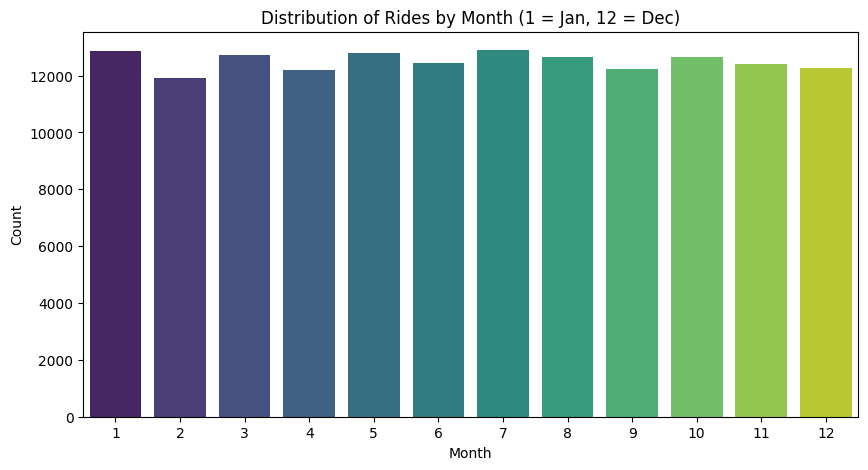

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='ride_month',
    order=sorted(df['ride_month'].unique()),
    palette='viridis'
)

plt.title("Distribution of Rides by Month (1 = Jan, 12 = Dec)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
7. BOOKING VALUE</h3>

In [50]:
df['booking_value'].describe()

count    102000.000000
mean        508.295912
std         395.805774
min          50.000000
25%         234.000000
50%         414.000000
75%         689.000000
max        4277.000000
Name: booking_value, dtype: float64

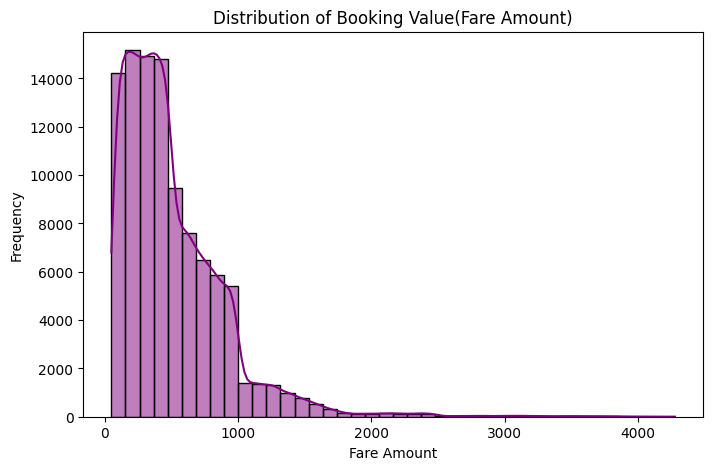

In [51]:
plt.figure(figsize = (8,5))
sns.histplot(
    df['booking_value'].dropna(),
    bins = 40,
    kde = True,
    color = 'purple'
)
plt.title("Distribution of Booking Value(Fare Amount)")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

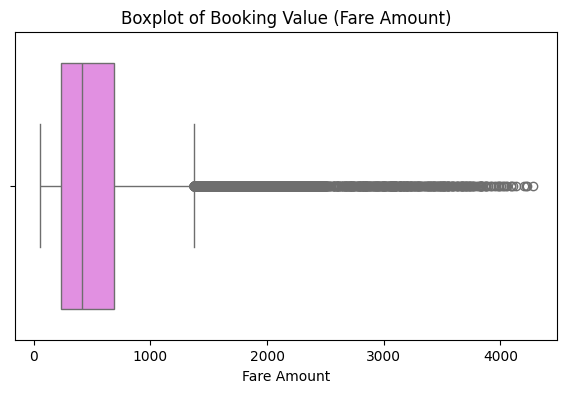

In [53]:
# BOXPLOT (TO DETECT OUTLIERS)

plt.figure(figsize = (7,4))
sns.boxplot(x=df['booking_value'], color = 'violet')
plt.title("Boxplot of Booking Value (Fare Amount)")
plt.xlabel("Fare Amount")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
8. RIDE DISTANCE</h3>

In [65]:
df['ride_distance'].describe()

count    102000.000000
mean         24.637012
std          14.002138
min           1.000000
25%          12.460000
50%          23.720000
75%          36.820000
max          50.000000
Name: ride_distance, dtype: float64

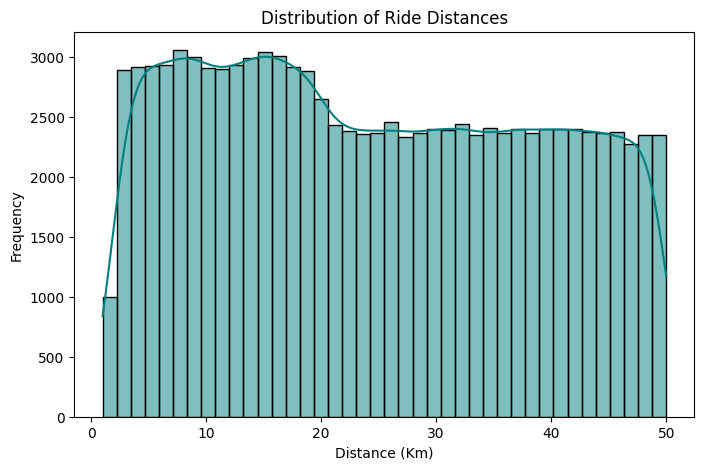

In [72]:
plt.figure(figsize = (8,5))
sns.histplot(
    df['ride_distance'].dropna(),
    bins = 40,
    kde = True,
    color = 'teal'
)

plt.title("Distribution of Ride Distances")
plt.xlabel("Distance (Km)")
plt.ylabel("Frequency")
plt.show()

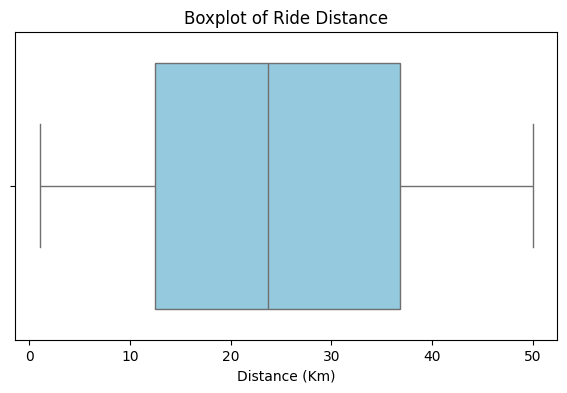

In [70]:
# BOXPLOT (TO DETECT OUTLIERS)

plt.figure(figsize = (7,4))
sns.boxplot(x = df['ride_distance'], color = 'skyblue')
plt.title("Boxplot of Ride Distance")
plt.xlabel("Distance (Km)")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
9. DRIVER RATING</h3>

In [71]:
df['driver_rating'].describe()

count    93000.000000
mean         4.230992
std          0.436871
min          3.000000
25%          4.100000
50%          4.300000
75%          4.600000
max          5.000000
Name: driver_rating, dtype: float64

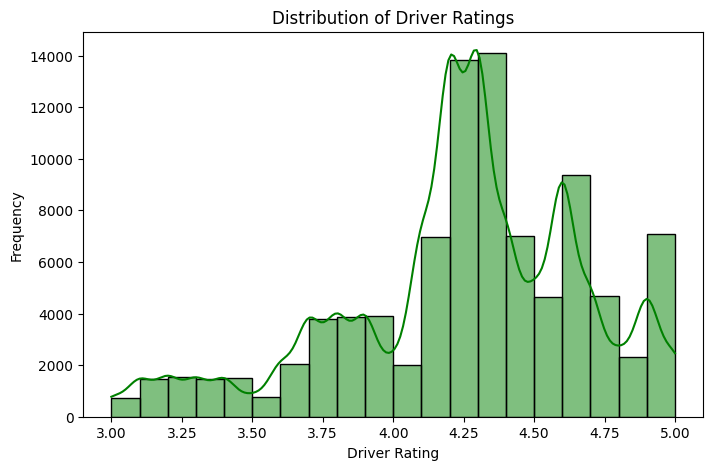

In [73]:
plt.figure(figsize = (8,5))
sns.histplot(
    df['driver_rating'].dropna(),
    bins = 20,
    kde = True,
    color = 'green'
)

plt.title("Distribution of Driver Ratings")
plt.xlabel("Driver Rating")
plt.ylabel("Frequency")
plt.show()

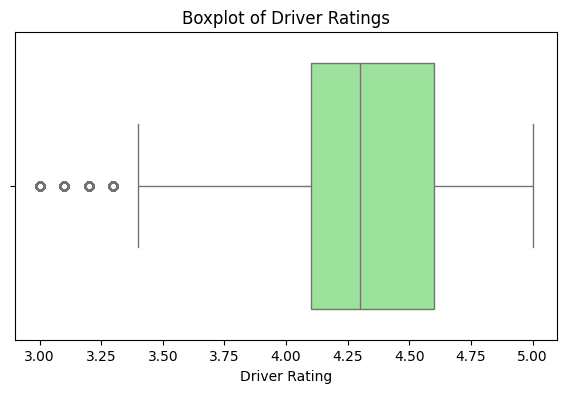

In [74]:
# BOXPLOT (TO DETECT OUTLIERS)

plt.figure(figsize = (7,4))
sns.boxplot( x = df['driver_rating'], color = 'lightgreen')
plt.title("Boxplot of Driver Ratings")
plt.xlabel("Driver Rating")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
10. CUSTOMER RATING</h3>

In [75]:
df['customer_rating'].describe()

count    93000.000000
mean         4.404584
std          0.437819
min          3.000000
25%          4.200000
50%          4.500000
75%          4.800000
max          5.000000
Name: customer_rating, dtype: float64

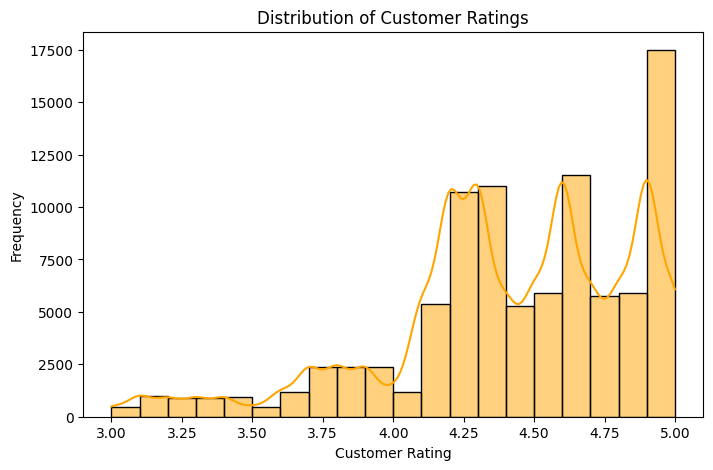

In [76]:
plt.figure(figsize = (8,5))
sns.histplot(
    df['customer_rating'].dropna(),
    bins = 20,
    kde = True,
    color = 'orange'
)

plt.title("Distribution of Customer Ratings")
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.show()

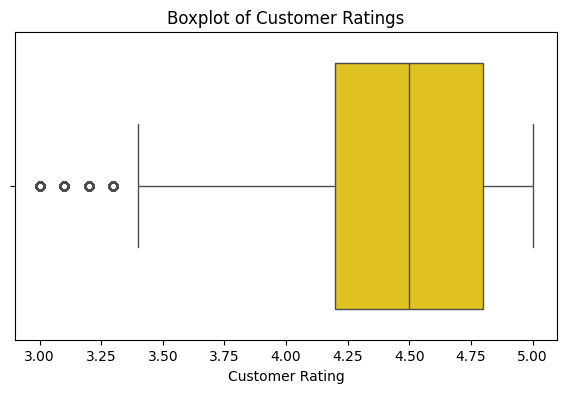

In [78]:
# BOXPLOT (TO DETECT OUTLIERS)

plt.figure(figsize = (7,4))
sns.boxplot(x = df['customer_rating'], color = 'gold')
plt.title("Boxplot of Customer Ratings")
plt.xlabel("Customer Rating")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
11. BOOKING STATUS</h3>

In [79]:
df['booking_status'].value_counts()

booking_status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\1487572859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


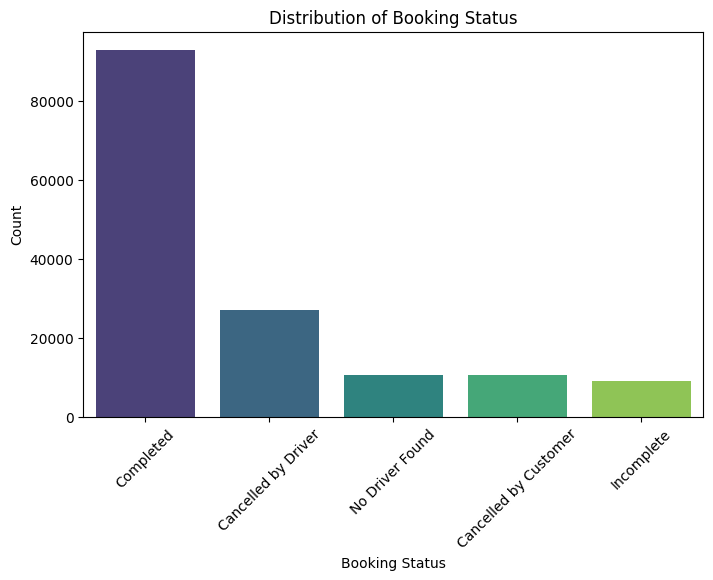

In [80]:
plt.figure(figsize = (8,5))
sns.countplot(
    data =df,
    x = 'booking_status',
    order = df['booking_status'].value_counts().index,
    palette = 'viridis'
)

plt.title("Distribution of Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

<h2 style="text-align:center; color:#1f77b4;">
BIVARIATE ANALYSIS</h2>

<h3 style="text-align:left; color:#1f77b4;">
1. RIDE TYPE VS RIDE HOUR</h3>

In [96]:
pd.crosstab(df['ride_hour'],df['ride_type'])

ride_type,Cancelled by Customer,Cancelled by Driver,Completed,Incomplete,No Driver Found
ride_hour,,,,,
0,92,248,858,82,93
1,94,250,828,78,110
2,75,222,853,82,107
3,92,263,860,69,99
4,98,240,830,64,89
5,204,532,1715,148,187
6,306,699,2609,238,308
7,376,1006,3346,335,387
8,493,1221,4267,403,477


In [97]:
pd.crosstab(df['ride_hour'],df['ride_type'],normalize = 'index')*100

ride_type,Cancelled by Customer,Cancelled by Driver,Completed,Incomplete,No Driver Found
ride_hour,,,,,
0,6.700655,18.062637,62.490896,5.972323,6.773489
1,6.911765,18.382353,60.882353,5.735294,8.088235
2,5.601195,16.579537,63.704257,6.123973,7.991038
3,6.652205,19.016631,62.183659,4.989154,7.158351
4,7.418622,18.168055,62.831188,4.844815,6.737320
5,7.322326,19.095477,61.557789,5.312276,6.712132
6,7.355769,16.802885,62.716346,5.721154,7.403846
7,6.899083,18.458716,61.394495,6.146789,7.100917
8,7.185541,17.796240,62.192100,5.873779,6.952339


<Figure size 1200x600 with 0 Axes>

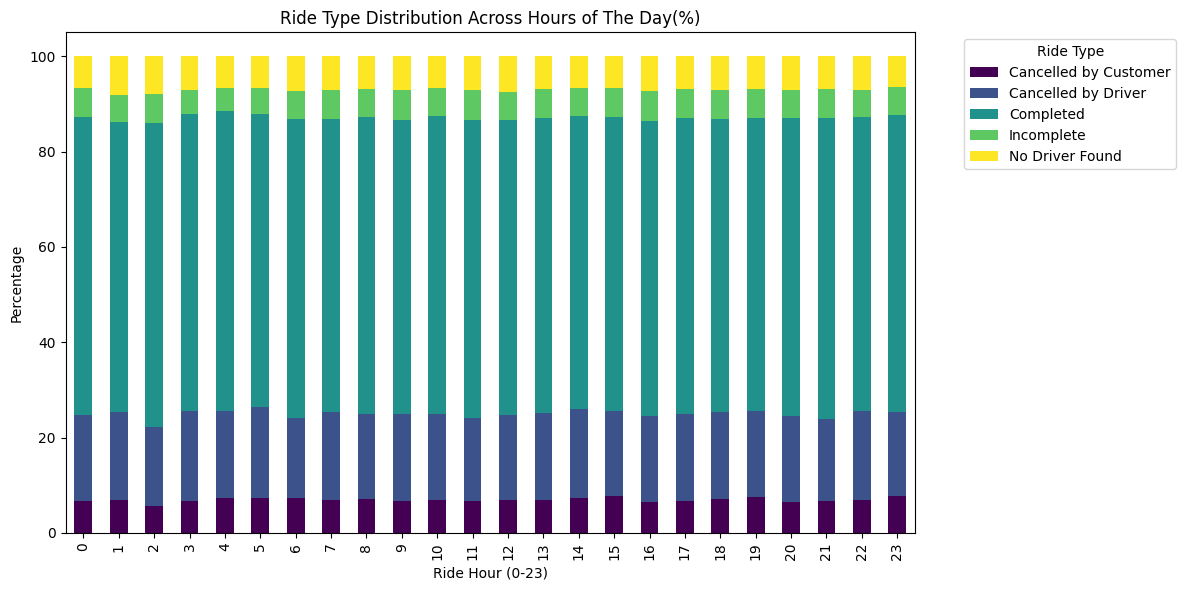

In [101]:
plt.figure(figsize = (12,6))
ride_hour_type = pd.crosstab(df['ride_hour'], df['ride_type'], normalize = 'index')*100
ride_hour_type.plot(kind = 'bar', stacked = True, colormap = 'viridis', figsize = (12,6))
plt.title("Ride Type Distribution Across Hours of The Day(%)")
plt.xlabel("Ride Hour (0-23)")
plt.ylabel("Percentage")
plt.legend(title = "Ride Type", bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
2. RIDE TYPE VS RIDE DISTANCE</h3>

In [102]:
df.groupby('ride_type')['ride_distance'].mean()

ride_type
Cancelled by Customer          NaN
Cancelled by Driver            NaN
Completed                26.000493
Incomplete               10.547706
No Driver Found                NaN
Name: ride_distance, dtype: float64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\2220173295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ride_type', y='ride_distance', palette='viridis')


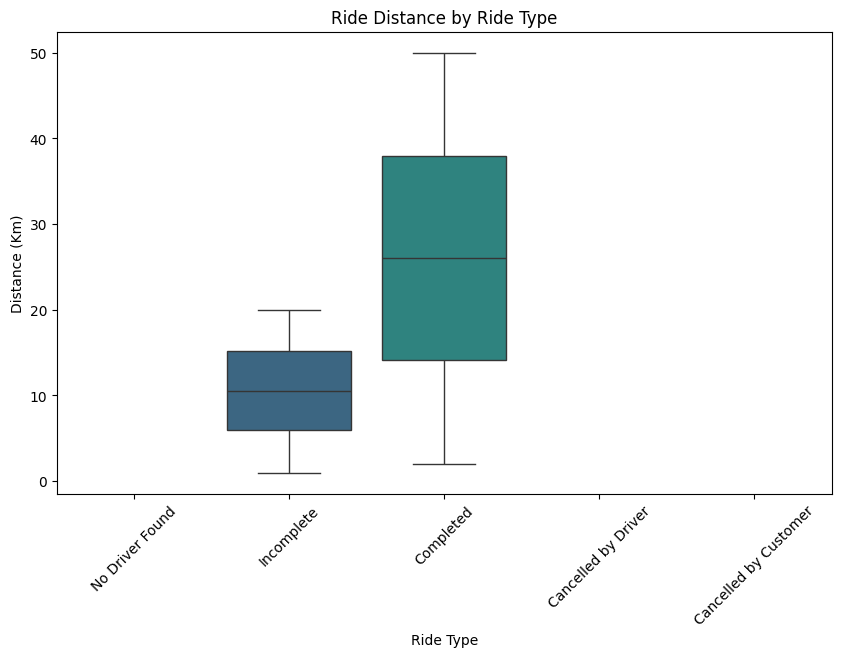

In [106]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='ride_type', y='ride_distance', palette='viridis')
plt.title("Ride Distance by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Distance (Km)")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
3. BOOKING STATUS VS VEHICLE TYPE</h3>

In [113]:
pd.crosstab(df['vehicle_type'], df['booking_status'], normalize = 'index')*100

booking_status,Cancelled by Customer,Cancelled by Driver,Completed,Incomplete,No Driver Found
vehicle_type,,,,,
Auto,7.162137,17.753013,61.880328,6.039712,7.164809
Bike,6.994715,18.106320,62.326242,5.897766,6.674957
EBike,6.848537,18.063844,62.053614,5.967604,7.066401
Go Mini,7.035496,17.882306,62.232436,6.089378,6.760384
Go Sedan,6.749936,18.536531,61.442099,6.049888,7.221547
Premier Sedan,6.990227,17.944895,62.127989,5.869361,7.067528
Uber XL,7.349966,17.127444,62.553383,5.888964,7.080243


In [114]:
pd.crosstab(df['vehicle_type'], df['booking_status'])

booking_status,Cancelled by Customer,Cancelled by Driver,Completed,Incomplete,No Driver Found
vehicle_type,,,,,
Auto,2680,6643,23155,2260,2681
Bike,1575,4077,14034,1328,1503
EBike,723,1907,6551,630,746
Go Mini,2097,5330,18549,1815,2015
Go Sedan,1832,5031,16676,1642,1960
Premier Sedan,1266,3250,11252,1063,1280
Uber XL,327,762,2783,262,315


<Figure size 1200x600 with 0 Axes>

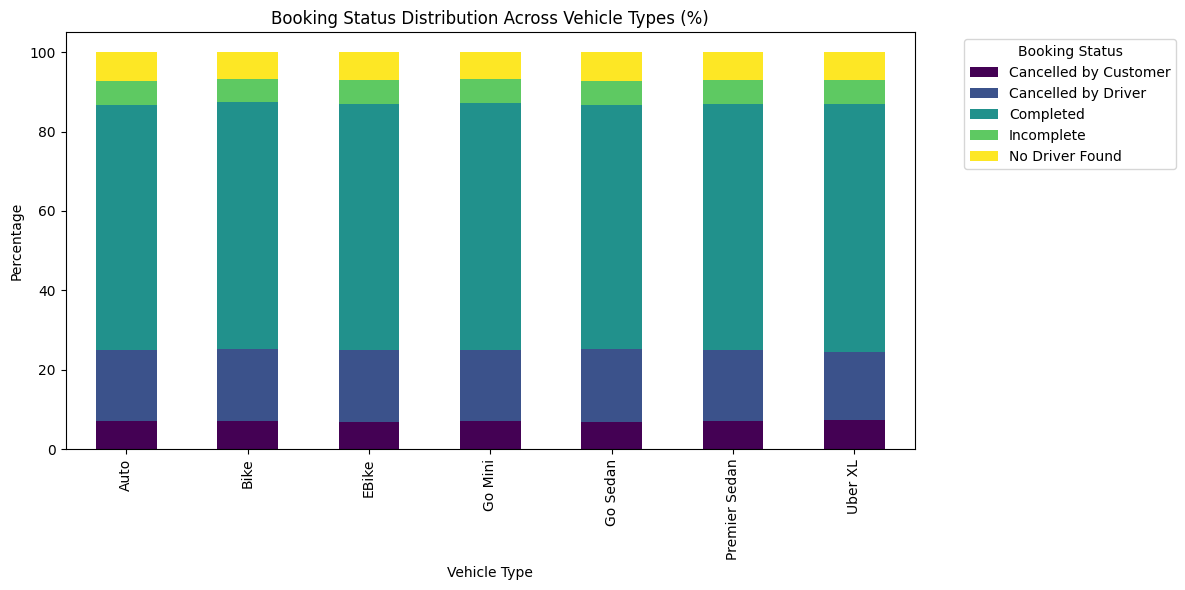

In [115]:
plt.figure(figsize = (12,6))
vt_status = pd.crosstab(df['vehicle_type'], df['booking_status'], normalize = 'index')*100
vt_status.plot(kind = 'bar', stacked = True, colormap = 'viridis', figsize = (12,6))
plt.title("Booking Status Distribution Across Vehicle Types (%)")
plt.xlabel("Vehicle Type")
plt.ylabel("Percentage")
plt.legend(title = "Booking Status", bbox_to_anchor = (1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
4. BOOKING VALUE VS RIDE DISTANCE</h3>

In [116]:
df[['ride_distance', 'booking_value']].corr()

,ride_distance,booking_value
ride_distance,1.000000,0.005174
booking_value,0.005174,1.000000


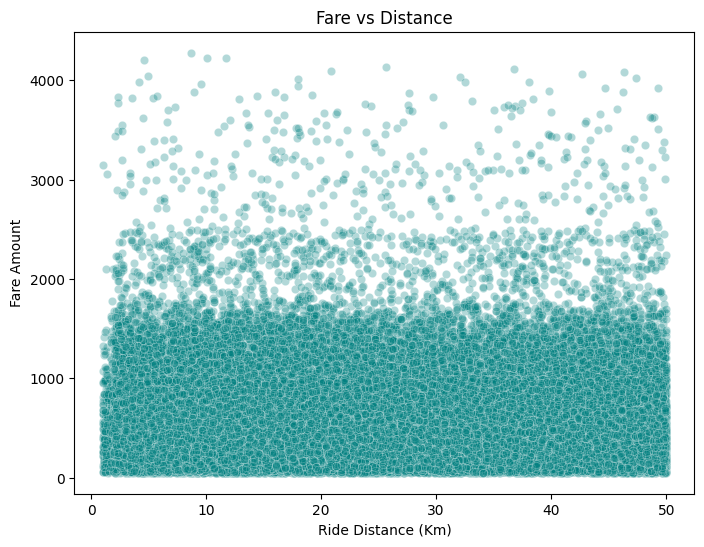

In [119]:
plt.figure(figsize = (8,6))
sns.scatterplot(
    data = df,
    x = 'ride_distance',
    y = 'booking_value',
    alpha = 0.3,
    color = 'teal'
)

plt.title("Fare vs Distance")
plt.xlabel("Ride Distance (Km)")
plt.ylabel("Fare Amount")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
5. DRIVER RATING VS RIDE TYPE</h3>

In [120]:
df.groupby('ride_type')['driver_rating'].mean()

ride_type
Cancelled by Customer         NaN
Cancelled by Driver           NaN
Completed                4.230992
Incomplete                    NaN
No Driver Found               NaN
Name: driver_rating, dtype: float64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\2070510326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'ride_type', y = 'driver_rating', palette = 'viridis')


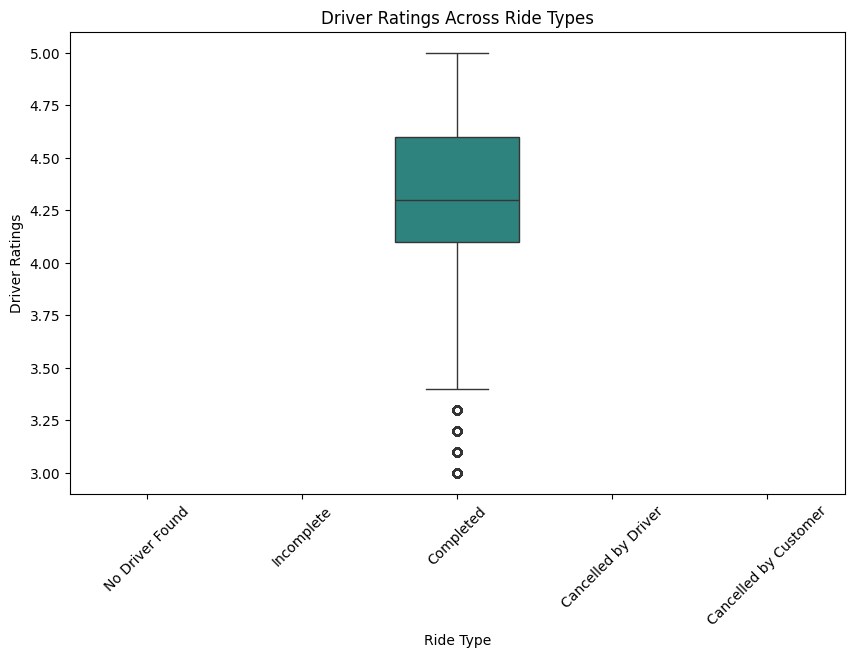

In [121]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'ride_type', y = 'driver_rating', palette = 'viridis')
plt.title("Driver Ratings Across Ride Types")
plt.xlabel("Ride Type")
plt.ylabel("Driver Ratings")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
6. CUSTOMER RATING VS RIDE TYPE</h3>

In [122]:
df.groupby('ride_type')['customer_rating'].mean()

ride_type
Cancelled by Customer         NaN
Cancelled by Driver           NaN
Completed                4.404584
Incomplete                    NaN
No Driver Found               NaN
Name: customer_rating, dtype: float64

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_31468\4063346116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'ride_type', y = 'customer_rating', palette = 'magma')


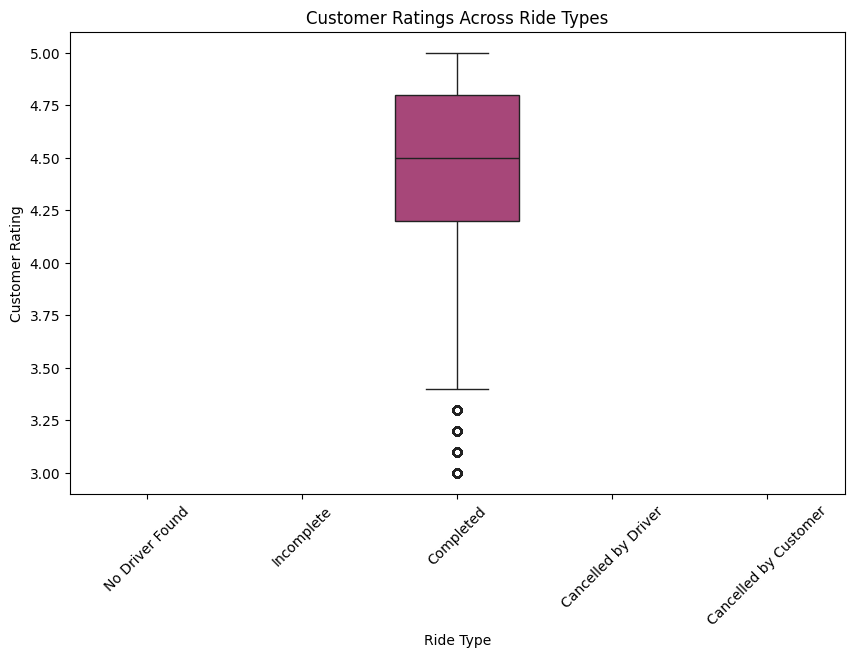

In [123]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'ride_type', y = 'customer_rating', palette = 'magma')
plt.title("Customer Ratings Across Ride Types")
plt.xlabel("Ride Type")
plt.ylabel("Customer Rating")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
7. PAYMENT METHOD VS RIDE TYPE</h3>

In [125]:
pd.crosstab(df['payment_method'], df['ride_type'], normalize = 'index')*100

ride_type,Completed,Incomplete
payment_method,,
Cash,91.118382,8.881618
Credit Card,91.291997,8.708003
Debit Card,91.346037,8.653963
UPI,91.123745,8.876255
Uber Wallet,91.283806,8.716194


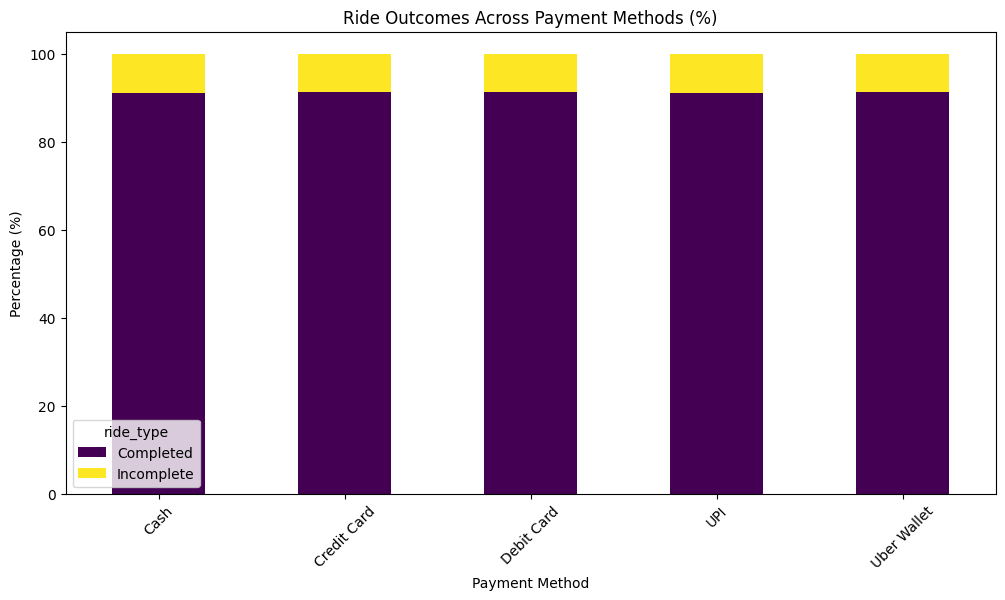

In [126]:
pm = pd.crosstab(df['payment_method'], df['ride_type'], normalize = 'index')*100
pm = pm[['Completed', 'Incomplete']]
pm.plot(kind = 'bar', stacked = True, figsize = (12,6), colormap = 'viridis')
plt.title("Ride Outcomes Across Payment Methods (%)")
plt.xlabel("Payment Method")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 45)
plt.show()

<h2 style="text-align:center; color:#1f77b4;">
MULTIVARIATE ANALYSIS</h2>

<h3 style="text-align:left; color:#1f77b4;">
1. CORRELATION HEATMAP (NUMERICAL ANALYSIS)</h3>

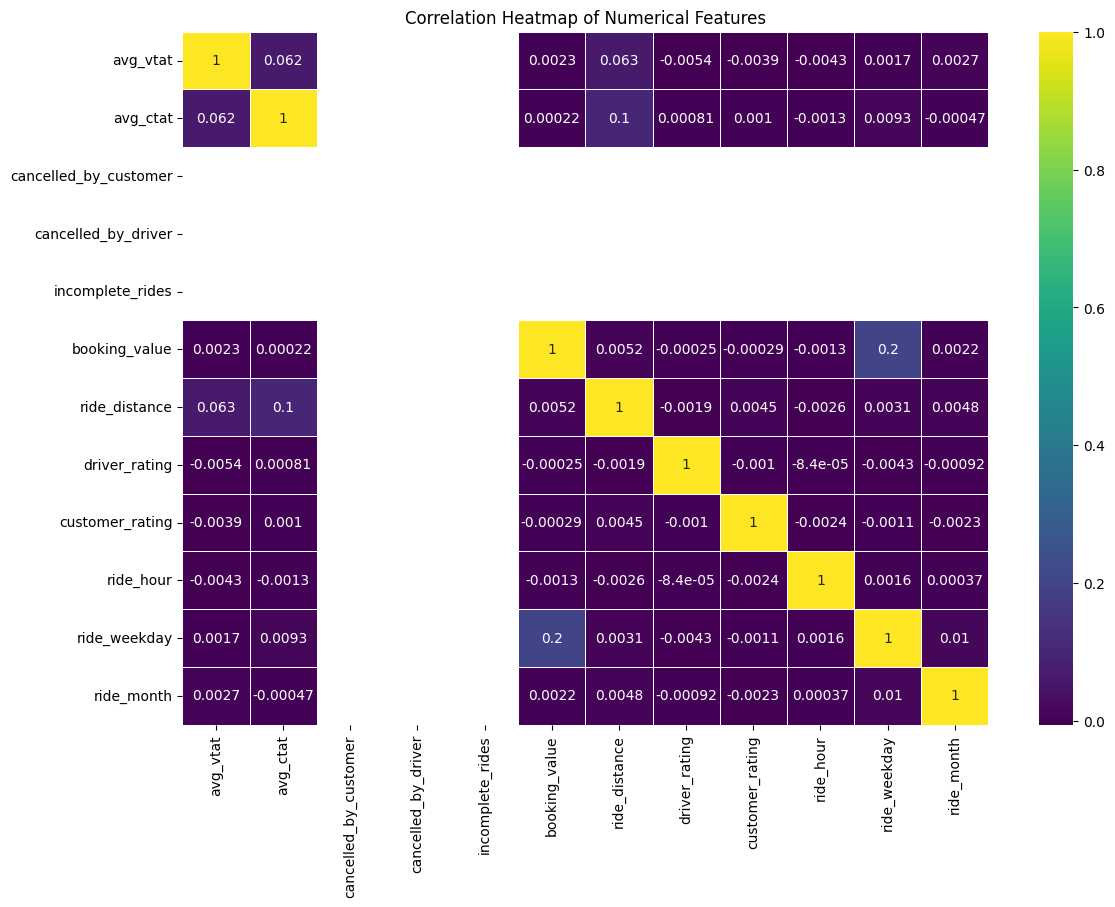

In [151]:
numeric_cols = ['avg_vtat', 'avg_ctat', 'cancelled_by_customer', 'cancelled_by_driver', 'incomplete_rides', 'booking_value', 'ride_distance', 'driver_rating', 'customer_rating', 'ride_hour', 'ride_weekday', 'ride_month']
corr = df[numeric_cols].corr()
plt.figure(figsize = (13,9))
sns.heatmap(corr, annot = True, cmap = 'viridis', linewidths = 0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
2. FARE VS DISTANCE VS VEHICLE TYPE</h3>

In [152]:
# AVERAGE FARE PER KM BY VEHICLE TYPE
df['fare_per_km'] = df['booking_value']/df['ride_distance']
df.groupby('vehicle_type')['fare_per_km'].mean().sort_values(ascending = False)

vehicle_type
Go Sedan         38.220880
Bike             38.168779
Auto             38.085136
Uber XL          37.932004
Premier Sedan    37.855816
Go Mini          37.642931
EBike            36.314851
Name: fare_per_km, dtype: float64

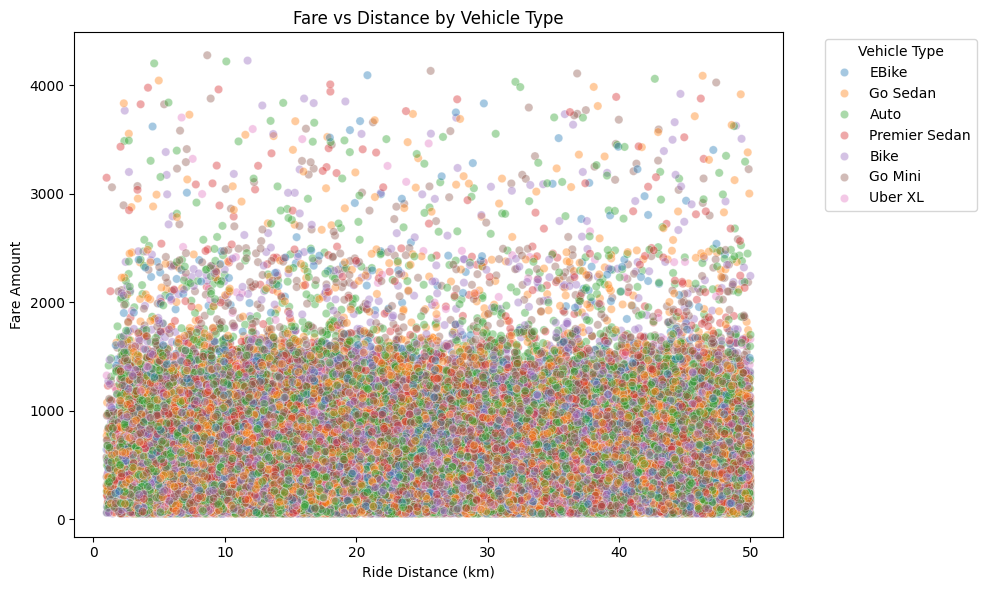

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='ride_distance',
    y='booking_value',
    hue='vehicle_type',
    alpha=0.4
)
plt.title("Fare vs Distance by Vehicle Type")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Fare Amount")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h3 style="text-align:left; color:#1f77b4;">
3. RIDE HOURS VS WEEKDAY VS RIDE COUNT</h3>

In [154]:
heatmap_data = pd.pivot_table(
    df,
    values='booking_id',
    index='ride_weekday',
    columns='ride_hour',
    aggfunc='count'
)

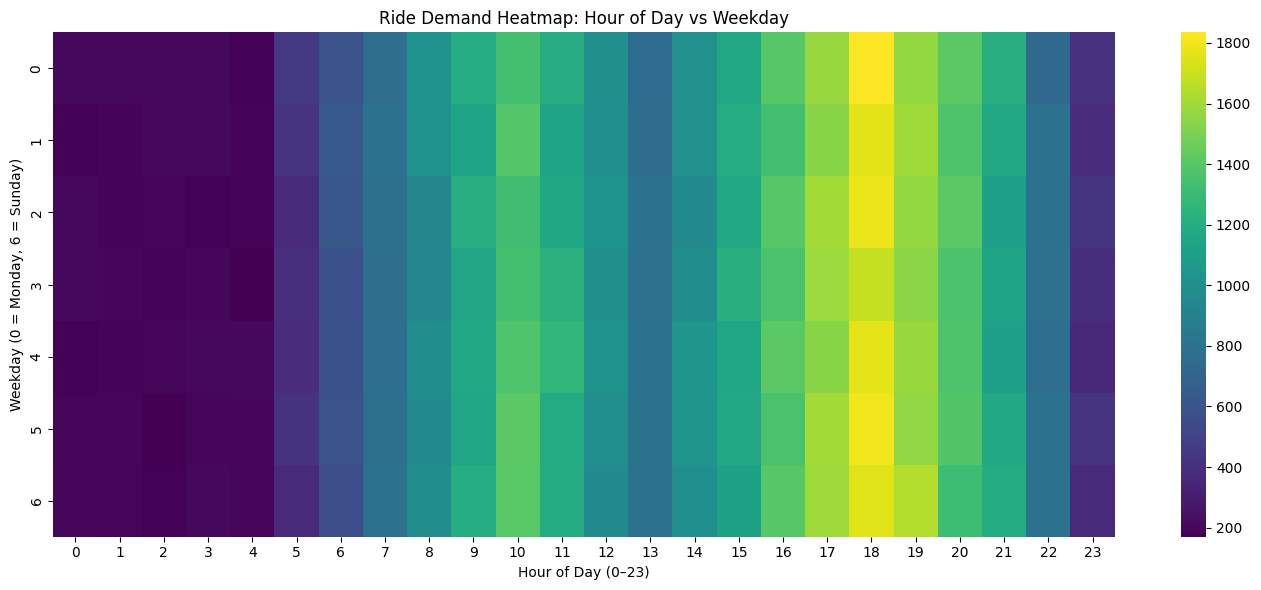

In [155]:
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title("Ride Demand Heatmap: Hour of Day vs Weekday")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Weekday (0 = Monday, 6 = Sunday)")
plt.tight_layout()
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
4. CANCELLATIONS VS HOUR VS VEHICLE TYPE</h3>

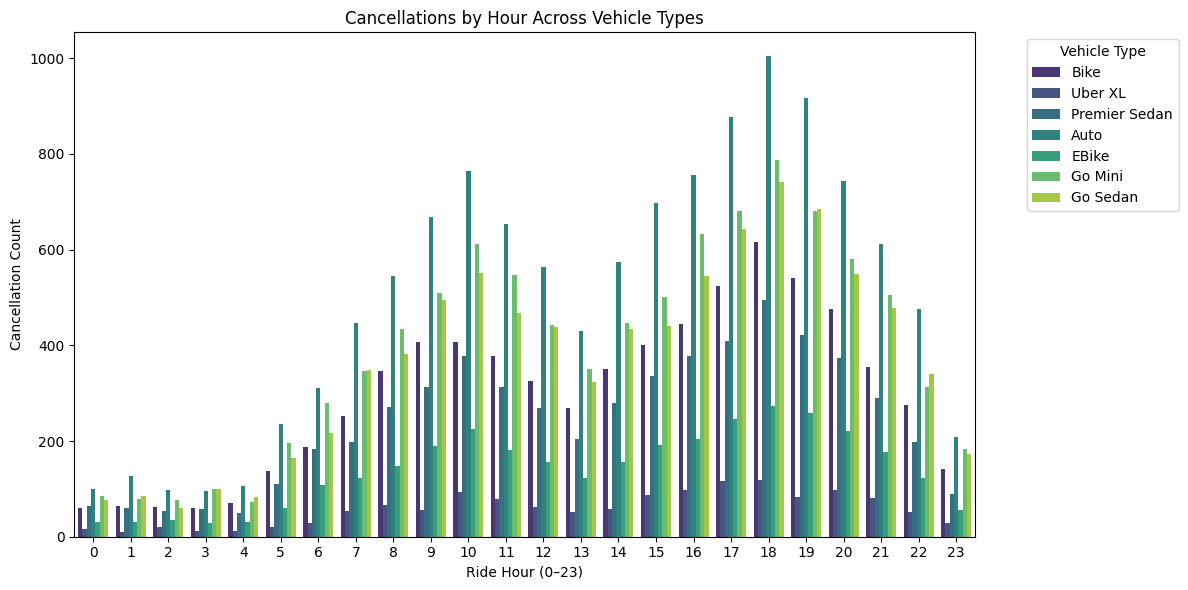

In [156]:
cancel_df = df[df['ride_type'].isin(['Cancelled by Driver', 'Cancelled by Customer', 'No Driver Found'])]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(
    data=cancel_df,
    x='ride_hour',
    hue='vehicle_type',
    palette='viridis'
)

plt.title("Cancellations by Hour Across Vehicle Types")
plt.xlabel("Ride Hour (0–23)")
plt.ylabel("Cancellation Count")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

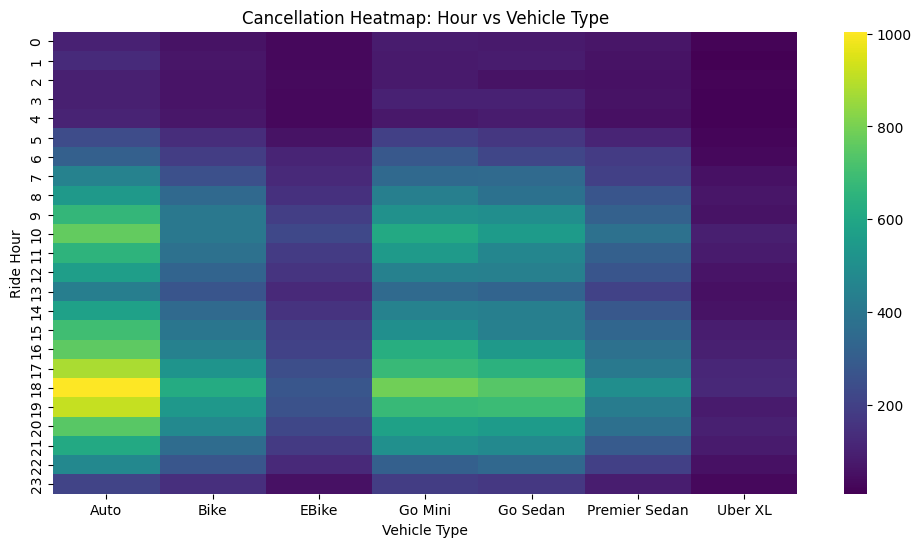

In [157]:
cancel_heatmap = pd.crosstab(cancel_df['ride_hour'], cancel_df['vehicle_type'])

plt.figure(figsize=(12,6))
sns.heatmap(cancel_heatmap, cmap='viridis')
plt.title("Cancellation Heatmap: Hour vs Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Ride Hour")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
5. INCOMPLETE RIDES VS REASON VS VEHICLE TYPE</h3>

In [159]:
# FILTER INCOMPLETE RIDES

incomplete_df = df[df['ride_type'] == 'Incomplete']

# COUNT INCOMPLETE REASONS BY VEHICLE TYPE

pd.crosstab(incomplete_df['vehicle_type'], incomplete_df['incomplete_reason'])

incomplete_reason,Customer Demand,Other Issue,Vehicle Breakdown
vehicle_type,,,
Auto,778,742,740
Bike,449,420,459
EBike,210,201,219
Go Mini,594,604,617
Go Sedan,563,503,576
Premier Sedan,349,388,326
Uber XL,97,90,75


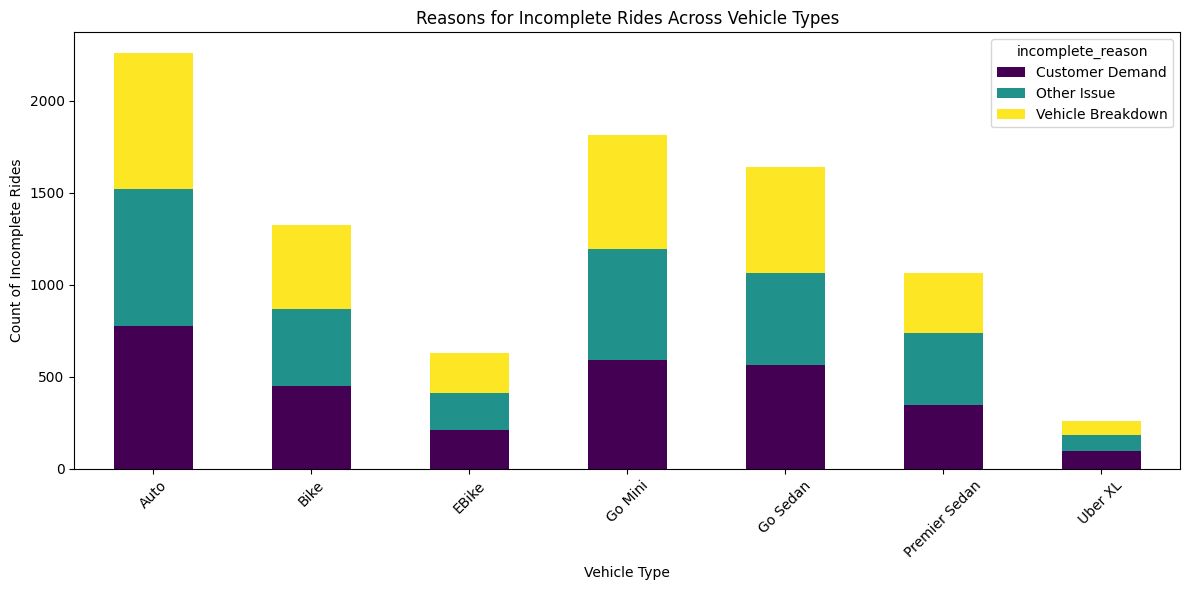

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

reason_table = pd.crosstab(
    incomplete_df['vehicle_type'], 
    incomplete_df['incomplete_reason']
)

reason_table.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='viridis'
)

plt.title("Reasons for Incomplete Rides Across Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Count of Incomplete Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3 style="text-align:left; color:#1f77b4;">
6. RATINGS VS DISTANCE VS RIDE OUTCOME</h3>

In [160]:
# FILTER ONLY COMPLETED RIDES (RATINGS ONLY EXIST HERE)

completed_df = df[df['ride_type'] == 'Completed']

# CORRELATION CHECK

completed_df[['ride_distance', 'driver_rating', 'customer_rating']].corr()

,ride_distance,driver_rating,customer_rating
ride_distance,1.000000,-0.001875,0.004514
driver_rating,-0.001875,1.000000,-0.001010
customer_rating,0.004514,-0.001010,1.000000


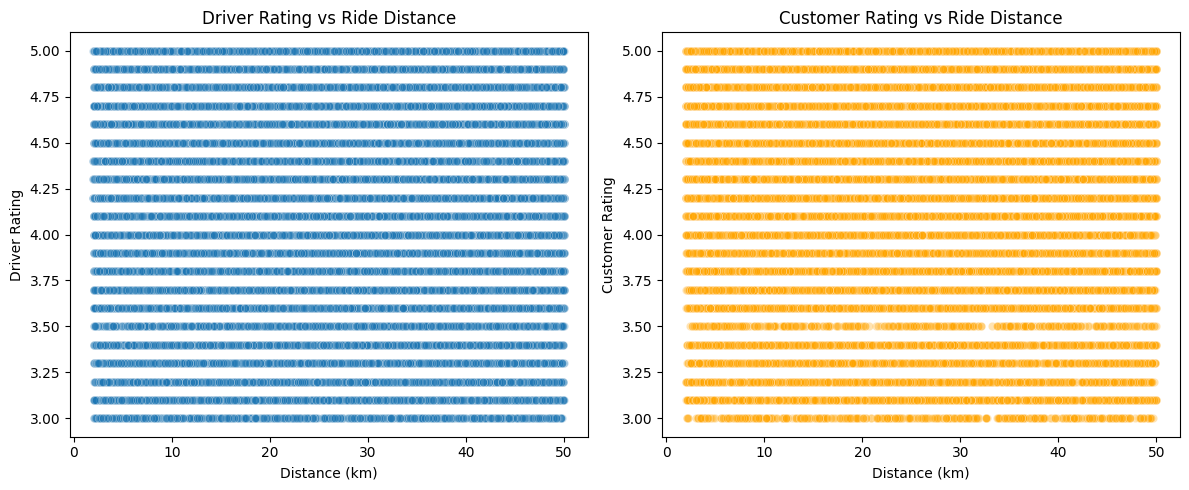

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Driver rating
plt.subplot(1,2,1)
sns.scatterplot(
    data=completed_df,
    x='ride_distance',
    y='driver_rating',
    alpha=0.3
)
plt.title("Driver Rating vs Ride Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Driver Rating")

# Customer rating
plt.subplot(1,2,2)
sns.scatterplot(
    data=completed_df,
    x='ride_distance',
    y='customer_rating',
    alpha=0.3,
    color='orange'
)
plt.title("Customer Rating vs Ride Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Customer Rating")

plt.tight_layout()
plt.show()
